# Technocolabs Mini Project

Importing Libraries Required for the Mini Project

In [1]:
import numpy as np
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading the Data into Notebook

In [2]:
df_train = pd.read_csv(r"C:\Users\rouna\Downloads\Technocolabs\9961_14084_bundle_archive\Train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test = pd.read_csv(r"C:\Users\rouna\Downloads\Technocolabs\9961_14084_bundle_archive\Test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
# Check the dimensions of the dataset
df_train.shape

(8523, 12)

In [5]:
# View the column names
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
# Check data types of columns
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Get basic statistics of numerical columns
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

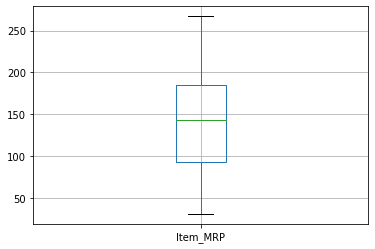

In [11]:
df_train.boxplot(column=['Item_MRP'])
plt.show()

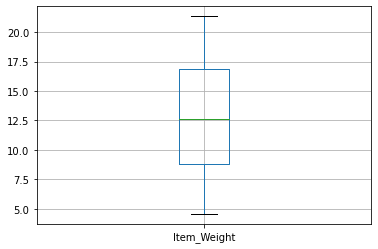

In [12]:
df_train.boxplot(column=['Item_Weight'])
plt.show()

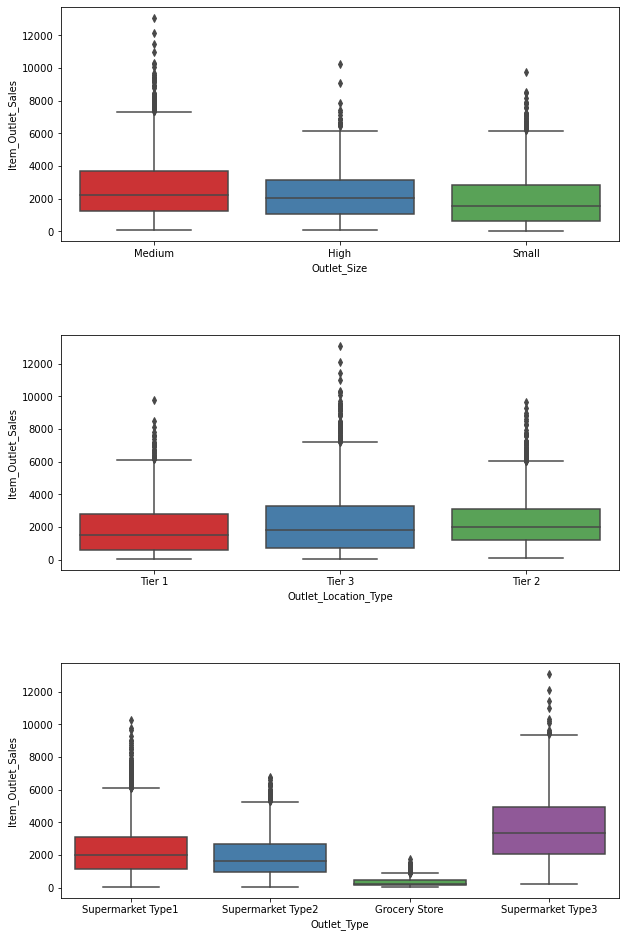

In [13]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

There are missing values in the Column Item_Weight, that is a continuous variable, so we will replace missing values by the mean value.
So the mean weight of the items is 12.857645.

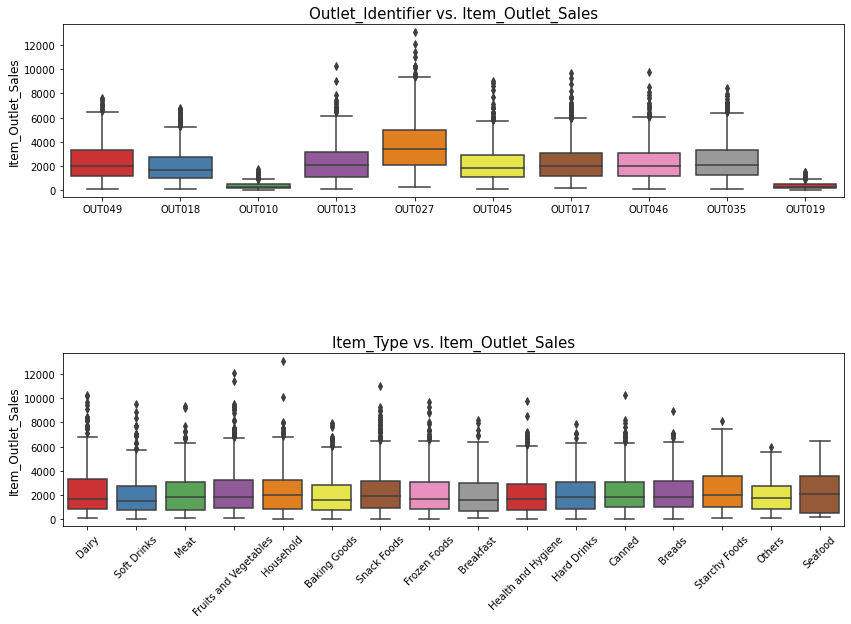

In [14]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

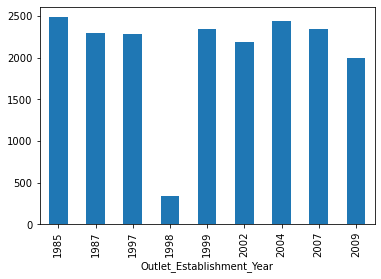

In [15]:
df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [16]:
column_name = "Item_Weight"
replacement_value = "12.857645"

df_train[column_name].fillna(replacement_value, inplace=True)
print(df_train["Item_Weight"])

0         9.3
1        5.92
2        17.5
3        19.2
4        8.93
        ...  
8518    6.865
8519     8.38
8520     10.6
8521     7.21
8522     14.8
Name: Item_Weight, Length: 8523, dtype: object


In [17]:
print(df_train["Outlet_Size"].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In the column Outlet_Size, there are missing values and here the values are categorical so we replace the missing values by the Mode Value(The variable with the highest frequency). The mode value is the "Medium".

In [18]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode)
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


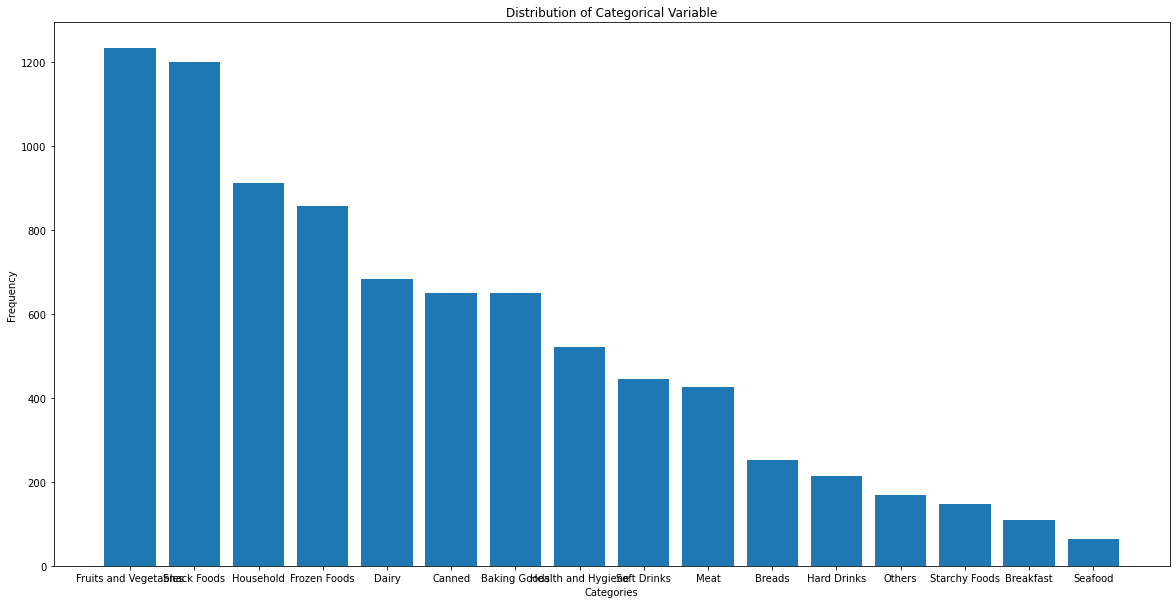

In [91]:
# Calculate the frequency of each category
category_counts = df_train['Item_Type'].value_counts()
plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Categorical Variable')

# Display the plot
plt.show()

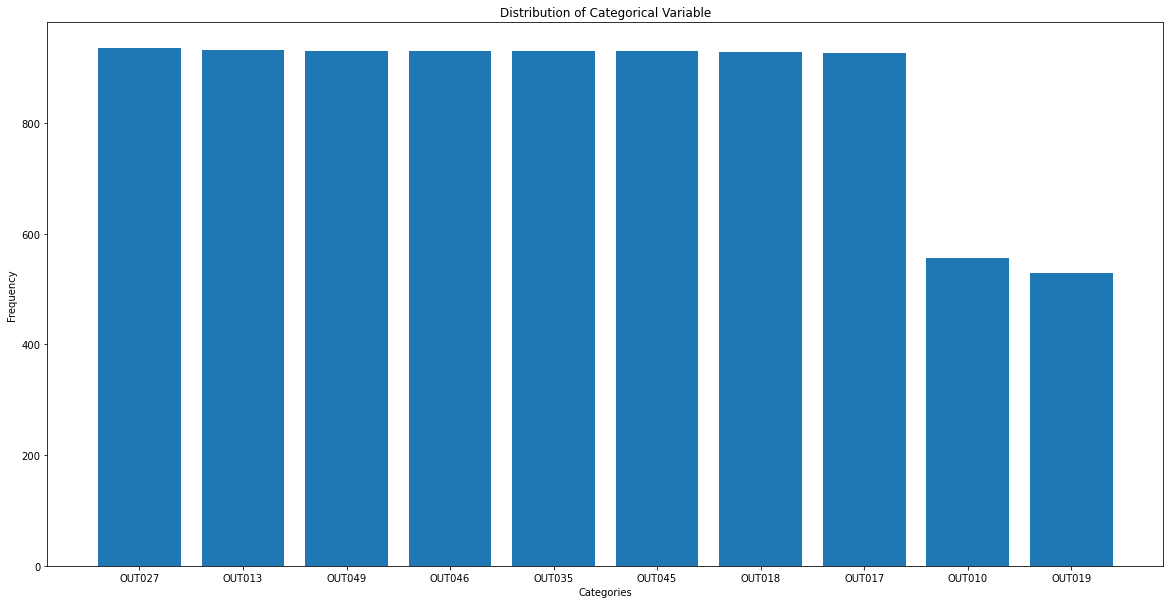

In [92]:
# Calculate the frequency of each category
category_counts = df_train['Outlet_Identifier'].value_counts()
plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Categorical Variable')

# Display the plot
plt.show()

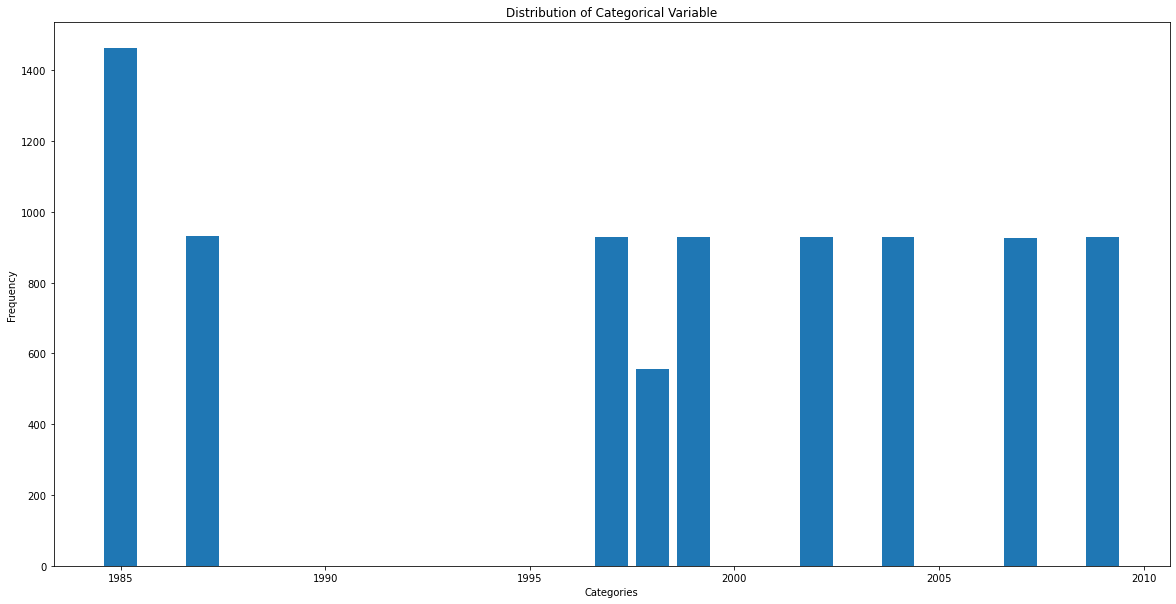

In [93]:
# Calculate the frequency of each category
category_counts = df_train['Outlet_Establishment_Year'].value_counts()
plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Categorical Variable')

# Display the plot
plt.show()

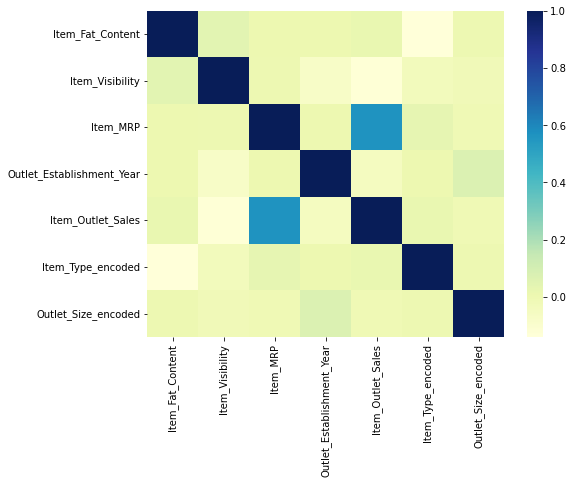

In [94]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=False, cmap='YlGnBu')
plt.show()

max correlation between item_MRP and Item_Outlet_Sales

In [95]:
from sklearn.preprocessing import StandardScaler 
std_scale = StandardScaler()
print(std_scale)
X_scaled = std_scale.fit_transform(X)

StandardScaler()


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

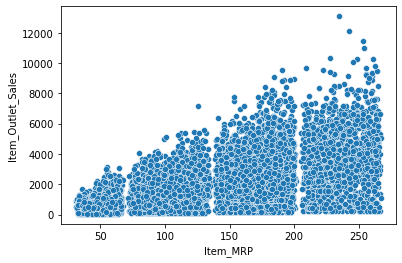

In [96]:
sns.scatterplot(x=df_train.Item_MRP, y=df_train['Item_Outlet_Sales'])

In [97]:
df_train=df_train.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
print(df_train.head)

<bound method NDFrame.head of      Item_Identifier Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15         9.3                 1         0.016047   
1              DRC01        5.92                 2         0.019278   
2              FDN15        17.5                 1         0.016760   
3              FDX07        19.2                 2         0.000000   
4              NCD19        8.93                 1         0.000000   
...              ...         ...               ...              ...   
8518           FDF22       6.865                 1         0.056783   
8519           FDS36        8.38                 2         0.046982   
8520           NCJ29        10.6                 1         0.035186   
8521           FDN46        7.21                 2         0.145221   
8522           DRG01        14.8                 1         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [98]:
grouped_df = df_train.groupby("Outlet_Identifier")
for group_name, group_data in grouped_df:
    print("Group Name:", group_name)
    print(group_data["Outlet_Identifier"].value_counts())  # Display the data for each group
    print()

Group Name: OUT010
OUT010    555
Name: Outlet_Identifier, dtype: int64

Group Name: OUT013
OUT013    932
Name: Outlet_Identifier, dtype: int64

Group Name: OUT017
OUT017    926
Name: Outlet_Identifier, dtype: int64

Group Name: OUT018
OUT018    928
Name: Outlet_Identifier, dtype: int64

Group Name: OUT019
OUT019    528
Name: Outlet_Identifier, dtype: int64

Group Name: OUT027
OUT027    935
Name: Outlet_Identifier, dtype: int64

Group Name: OUT035
OUT035    930
Name: Outlet_Identifier, dtype: int64

Group Name: OUT045
OUT045    929
Name: Outlet_Identifier, dtype: int64

Group Name: OUT046
OUT046    930
Name: Outlet_Identifier, dtype: int64

Group Name: OUT049
OUT049    930
Name: Outlet_Identifier, dtype: int64



In [99]:
grouped_train = df_train.groupby("Outlet_Identifier")
column_name = "Item_Type"
for group_name, group_data in grouped_train:
    print("Group Name:", group_name)
    print(group_data[column_name].value_counts())
    print()

Group Name: OUT010
Fruits and Vegetables    79
Snack Foods              71
Household                67
Frozen Foods             54
Dairy                    43
Baking Goods             42
Health and Hygiene       37
Canned                   35
Meat                     34
Soft Drinks              28
Breads                   17
Hard Drinks              16
Others                   10
Breakfast                 9
Starchy Foods             9
Seafood                   4
Name: Item_Type, dtype: int64

Group Name: OUT013
Fruits and Vegetables    142
Snack Foods              125
Household                103
Frozen Foods              92
Dairy                     80
Baking Goods              73
Canned                    65
Health and Hygiene        61
Soft Drinks               49
Meat                      41
Breads                    25
Hard Drinks               23
Starchy Foods             19
Others                    16
Breakfast                 13
Seafood                    5
Name: Item_Type, dt

In [100]:
named_groups = {}
for group_name, group_data in grouped_train:
    named_groups[group_name] = group_data
Outlet_1 = named_groups["OUT010"]
Outlet_2 = named_groups["OUT013"]
Outlet_3 = named_groups["OUT017"]
Outlet_4 = named_groups["OUT018"]
Outlet_5 = named_groups["OUT019"]
Outlet_6 = named_groups["OUT027"]
Outlet_7 = named_groups["OUT035"]
Outlet_8 = named_groups["OUT045"]
Outlet_9 = named_groups["OUT046"]
Outlet_10 = named_groups["OUT049"]

print("Outlet_1:")
print(Outlet_1.head())
print()

Outlet_1:
   Item_Identifier Item_Weight  Item_Fat_Content  Item_Visibility  \
3            FDX07        19.2                 2         0.000000   
28           FDE51       5.925                 2         0.161467   
30           FDV38       19.25                 1         0.170349   
45           FDM39        6.42                 1         0.089499   
65           FDC46        17.7                 1         0.195068   

                Item_Type  Item_MRP Outlet_Identifier  \
3   Fruits and Vegetables  182.0950            OUT010   
28                  Dairy   45.5086            OUT010   
30                  Dairy   55.7956            OUT010   
45                  Dairy  178.1002            OUT010   
65            Snack Foods  185.4266            OUT010   

    Outlet_Establishment_Year  \
3                        1998   
28                       1998   
30                       1998   
45                       1998   
65                       1998   

                                 

In [101]:
column_name = "Item_Type"
unique_variables = df_train[column_name].unique()

# Print the unique variables
print(unique_variables)

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']


In [102]:
grouped1_train = df_train.groupby("Item_Type")
for group_name, group_data in grouped1_train:
    print("Group Name:", group_name)
    print(group_data["Item_Type"].value_counts())  # Display the data for each group
    print()

Group Name: Baking Goods
Baking Goods             648
Breads                     0
Breakfast                  0
Canned                     0
Dairy                      0
Frozen Foods               0
Fruits and Vegetables      0
Hard Drinks                0
Health and Hygiene         0
Household                  0
Meat                       0
Others                     0
Seafood                    0
Snack Foods                0
Soft Drinks                0
Starchy Foods              0
Name: Item_Type, dtype: int64

Group Name: Breads
Breads                   251
Baking Goods               0
Breakfast                  0
Canned                     0
Dairy                      0
Frozen Foods               0
Fruits and Vegetables      0
Hard Drinks                0
Health and Hygiene         0
Household                  0
Meat                       0
Others                     0
Seafood                    0
Snack Foods                0
Soft Drinks                0
Starchy Foods             

In [103]:
named_groups = {}
for group_name, group_data in grouped1_train:
    named_groups[group_name] = group_data
Item_1 = named_groups["Dairy"]
Item_2 = named_groups["Soft Drinks"]
Item_3 = named_groups["Meat"]
Item_4 = named_groups["Fruits and Vegetables"]
Item_5 = named_groups["Household"]
Item_6 = named_groups["Baking Goods"]
Item_7 = named_groups["Snack Foods"]
Item_8 = named_groups["Frozen Foods"]
Item_9 = named_groups["Breakfast"]
Item_10 = named_groups["Health and Hygiene"]
Item_11 = named_groups["Hard Drinks"]
Item_12 = named_groups["Canned"]
Item_13 = named_groups["Breads"]
Item_14 = named_groups["Starchy Foods"]
Item_15 = named_groups["Seafood"]
Item_16 = named_groups["Others"]

print("Item_1:")
print(Item_1)
print()

Item_1:
     Item_Identifier Item_Weight  Item_Fat_Content  Item_Visibility Item_Type  \
0              FDA15         9.3                 1         0.016047     Dairy   
11             FDA03        18.5                 2         0.045464     Dairy   
19             FDU02       13.35                 1         0.102492     Dairy   
28             FDE51       5.925                 2         0.161467     Dairy   
30             FDV38       19.25                 1         0.170349     Dairy   
...              ...         ...               ...              ...       ...   
8424           FDC39       7.405                 1         0.159165     Dairy   
8447           FDS26       20.35                 1         0.089975     Dairy   
8448           FDV50        14.3                 1         0.123071     Dairy   
8457           FDY50         5.8                 1         0.130931     Dairy   
8512           FDR26        20.7                 1         0.042801     Dairy   

      Item_MRP Outl

In [104]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_encoded,Outlet_Size_encoded
0,FDA15,9.3,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4,1.0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14,1.0
2,FDN15,17.5,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10,1.0
3,FDX07,19.2,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store,732.3800,6,2.0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,13,2.0
8519,FDS36,8.38,2,0.046982,Baking Goods,108.1570,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1,549.2850,0,2.0
8520,NCJ29,10.6,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,8,0.0
8521,FDN46,7.21,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13,1.0


In [105]:
from sklearn.linear_model import LinearRegression

X = df_train[['Item_MRP']]  # Independent variable
y = df_train['Item_Outlet_Sales']  # Dependent variable

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficient(s):", coefficients)
print("Intercept:", intercept)


Coefficient(s): [15.55302354]
Intercept: -11.575142825171042


In [106]:
import statsmodels.api as sm

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create a model
model1 = sm.OLS(y, X)

# Fit the model to the data
results = model1.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:38:03   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5751     37.671     -0.307      0.7

In [107]:
#label encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories in the desired order
ordinal_categories = ['Small', 'Medium']

# Create an instance of OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[ordinal_categories], handle_unknown="use_encoded_value", unknown_value=2)

# Fit and transform the 'Outlet_Size' column
df_train['Outlet_Size_encoded'] = encoder.fit_transform(df_train[['Outlet_Size']])

# Display the encoded DataFrame
print(df_train[['Outlet_Size', 'Outlet_Size_encoded']])


                                            Outlet_Size  Outlet_Size_encoded
0                                                Medium                  1.0
1                                                Medium                  1.0
2                                                Medium                  1.0
3     <bound method Series.mode of 0       Medium\n1...                  2.0
4                                                  High                  2.0
...                                                 ...                  ...
8518                                               High                  2.0
8519  <bound method Series.mode of 0       Medium\n1...                  2.0
8520                                              Small                  0.0
8521                                             Medium                  1.0
8522                                              Small                  0.0

[8523 rows x 2 columns]


In [108]:
#ordinal encoding
import pandas as pd

# Convert 'Item_Type' column to categorical data type
df_train['Item_Type'] = df_train['Item_Type'].astype('category')

# Assign label-encoded values to 'Item_Type_encoded' column
df_train['Item_Type_encoded'] = df_train['Item_Type'].cat.codes

# Display the encoded DataFrame
print(df_train[['Item_Type', 'Item_Type_encoded']])


                  Item_Type  Item_Type_encoded
0                     Dairy                  4
1               Soft Drinks                 14
2                      Meat                 10
3     Fruits and Vegetables                  6
4                 Household                  9
...                     ...                ...
8518            Snack Foods                 13
8519           Baking Goods                  0
8520     Health and Hygiene                  8
8521            Snack Foods                 13
8522            Soft Drinks                 14

[8523 rows x 2 columns]


In [109]:
unique = df_train['Item_Type_encoded'].unique()
print(unique)

[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Random Forest
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators is the number of trees in the random forest

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, rf_predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, rf_predictions)
print("R-squared:", r2)

Mean Squared Error: 2677523.5801960365
R-squared: 0.014881137550949108


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains the feature matrix and y contains the target variable


# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,  # Maximum depth of each tree
    'eta': 0.1,  # Learning rate
    'eval_metric': 'error'  # Evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)
y_pred = [round(value) for value in y_pred]  # Convert probabilities to class labels

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


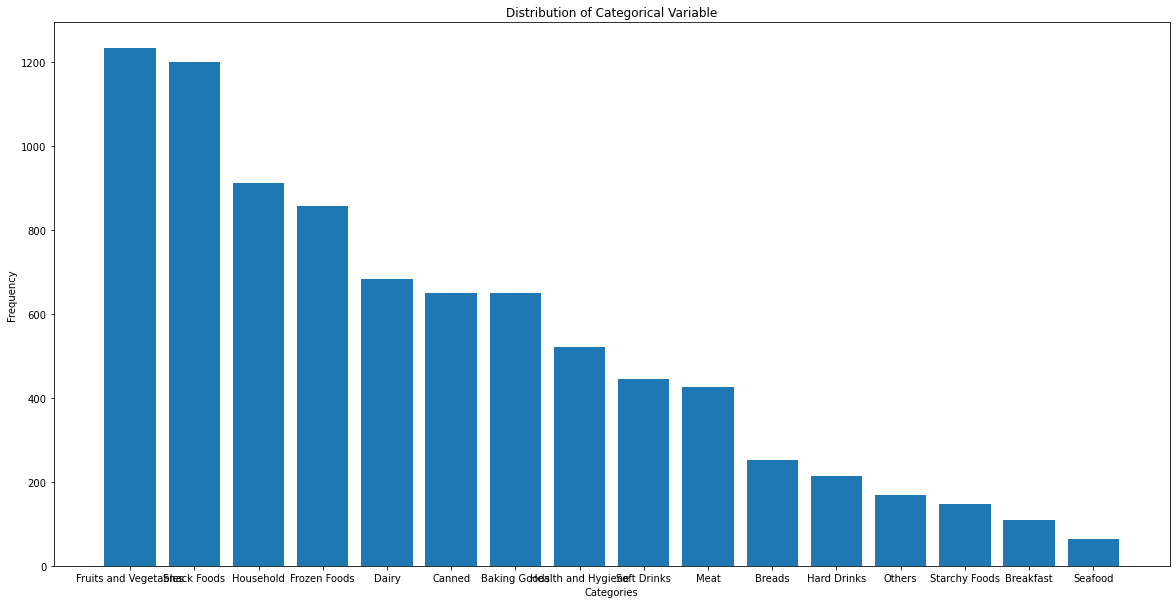

In [90]:

# Calculate the frequency of each category
category_counts = df_train['Item_Type'].value_counts()
plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Categorical Variable')

# Display the plot
plt.show()